$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°1| Visualización y pre-procesamiento de datos}$$



### Grupo N°4:

- Alonso Santiago Morán Espinoza
- Sergio Enrique Moreno Elescano

## Carga de dataset y librerias

1) El primer paso para la resolución del ejercicio práctico es la carga de librerías y el dataset denominado "cancer_challenge_cl2.csv" utilizando la libtería pandas

In [87]:
# Importación de librerías

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing

# Visualizamos los encabezados junto a los valores de cada columna
# Hacemos uso de la variable df_cancer

df_cancer = pd.read_csv("cancer_challenge_cl2.csv")
df_cancer.head()


,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,-1001.00,0.12,0.28,0.30,0.15,0.24,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0.00
1,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0.00
2,2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0.00
3,3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0.00
4,4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0.00


## Análisis preliminar de los datos

Se pueden observar que hay 31 columnas que muestran todos los datos del archivo, a continuación se menciona cada una de ellas y una breve descripción de la información que contiene. Para esto se consultaron las siguientes fuentes:

- W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
- O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
- W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

A continuación se muestran las características.

- Mean radius: Es el promedio de distancias desde el centro hacia los puntos del perímetro.
- Mean texture: La desviación estándar de los valores en escala de grises.
- Mean perimeter: Promedio de perímetros
- Mean area: Promedio de áreas.
- Mean smoothness: Promedio de variaciones locales en la longitud del radio.
- Mean compactness: Se obtuvo del cuadrado del perímetro dividido en entre el área menos 1.
- Mean concavity: Muestra el promedio de la severidad de la porciones cóncaves en el contorno.
- Mean concave points: Número de porciones cóncaves en el contorno.
- Mean symmetry: Media de la simetría.
- Mean fractal dimension
- Radius error
- Texture error
- Perimeter Error
- Area error
- Smoothness error
- Compactness error
- Concavity error
- Concave points error
- Symmetry error
- Fractal dimension error
- Worst radiues
- Worst texture
- Worst perimeter
- Worst area
- Worst smoothness
- Worst compactness
- Worst concavity
- Worst concave points
- Worst symmetry
- Worst fractal dimension
- Target: Valor binario que indica la presencia o asunecia de cáncer


## Análisis Exploratorio

2. Ahora se ingresará la información contenida en la variable df_cancer que corresponde a cada columna, se verifica la cantidad de valores que no son nulos.

In [88]:
# Se imprime la información de cada columna

print(df_cancer.info())
df_cancer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              567 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           564 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      562 non-null    float64
 9   mean symmetry            566 non-null    float64
 10  mean fractal dimension   561 non-null    float64
 11  radius error             564 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,567.00,569.00,564.00,569.00,569.00,569.00,569.00,562.00,566.00,...,569.00,564.00,569.00,566.00,569.00,564.00,565.00,563.00,562.00,563.00
mean,284.00,15.29,19.43,92.20,650.42,0.25,0.10,0.09,0.19,0.28,...,25.60,107.38,880.58,0.13,2.84,0.27,0.14,0.29,0.08,0.63
std,164.40,27.60,5.45,24.28,359.32,2.52,0.05,0.08,3.37,1.71,...,6.44,33.72,569.36,0.02,39.68,0.21,0.50,0.06,0.02,0.52
min,0.00,6.98,9.71,43.79,-1001.00,0.05,0.02,0.00,0.00,0.11,...,-20.00,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,142.00,11.71,16.17,75.41,418.70,0.09,0.06,0.03,0.02,0.16,...,21.06,84.10,515.30,0.12,0.15,0.12,0.06,0.25,0.07,0.00
50%,284.00,13.40,18.87,86.54,546.30,0.10,0.09,0.06,0.03,0.18,...,25.41,97.75,686.50,0.13,0.22,0.23,0.10,0.28,0.08,1.00
75%,426.00,15.93,21.81,104.40,782.60,0.11,0.13,0.13,0.07,0.20,...,29.72,126.00,1084.00,0.15,0.34,0.39,0.16,0.32,0.09,1.00
max,568.00,666.00,99.00,188.50,2501.00,45.00,0.35,0.43,80.00,34.00,...,49.54,251.20,4254.00,0.22,666.00,1.25,12.00,0.66,0.21,5.00


Se puede observar que hay ciertos datos nulos en el archivo a trabajar. Más adelante se propondrá una estrategia para lidiar con est etipo de datos.
A continuación se evalua el balance de la información con la que se cuenta y su relación con el target propuesto, es decir, si hay o no cáncer en la muestra.
Para esto se muestra un histograma utilizando la columna de target.

3) Evalua si la data esta balanceada para el target propuesto. Comenta tus resultados

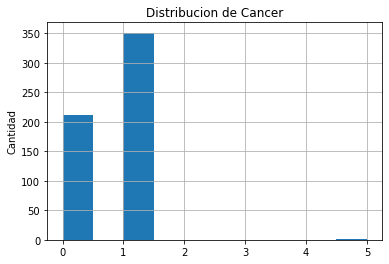

In [89]:
plt.hist(df_cancer['target'])
plt.title('Distribucion de Cancer')
plt.grid()
plt.ylabel("Cantidad")
plt.show()

Analizando el Histograma podemos concluir que si se podrá trabjar con los datos, sin emabrgo, estos deben ser procesados previamente ya que se cuenta con un valor anómalo que no es binario.

## Visualización de la data

A continuación, se propone un análasis visual más profundo de los datos propuestos. Para esto se observará lo siguiente:

- Distribución de cada variable
- Relación existente entre las variables
- Outlier en las variables

Este paso resulta fundamental para posteriormente procesar los datos según sea necesario.

### Distribucion de las variables

Valor anomalo corregido


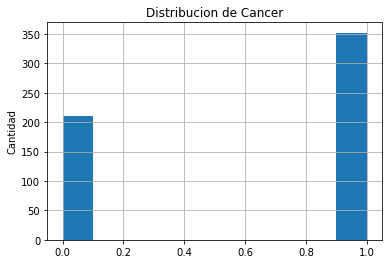

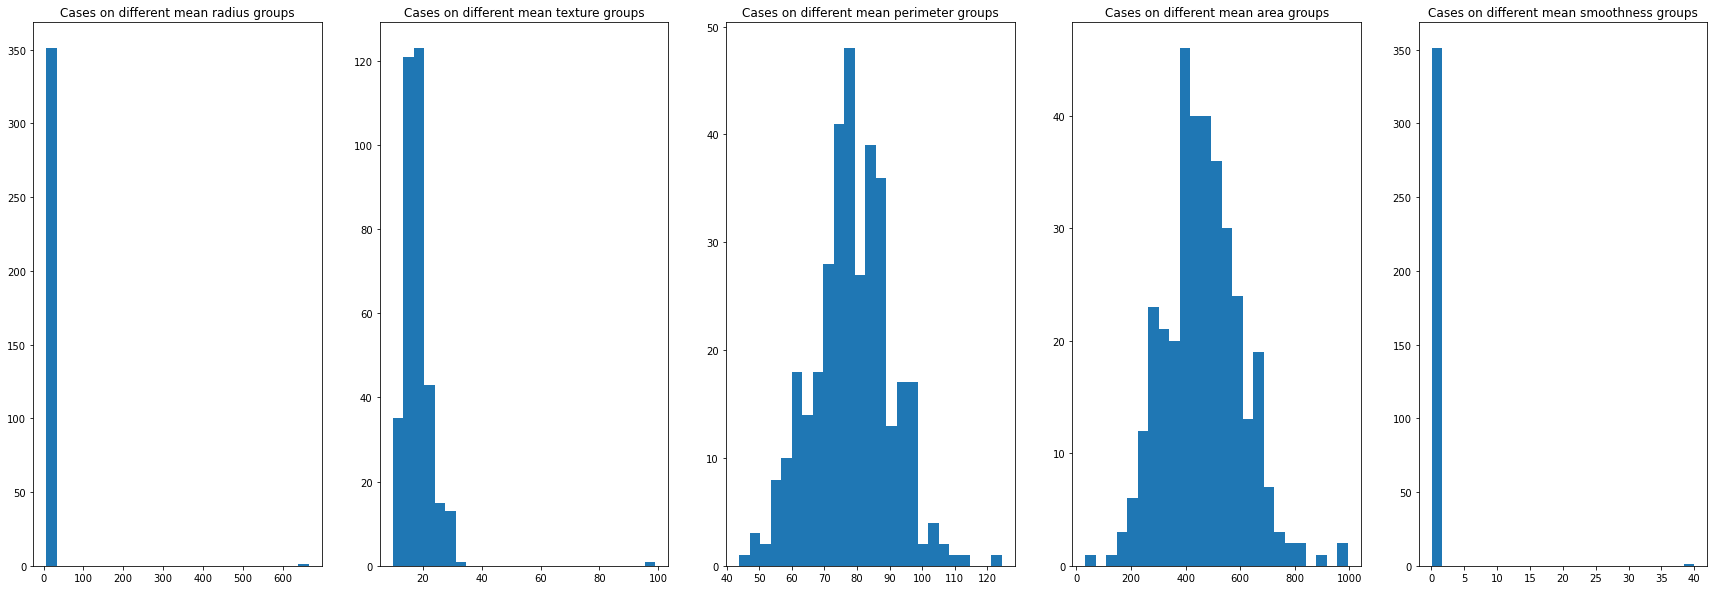

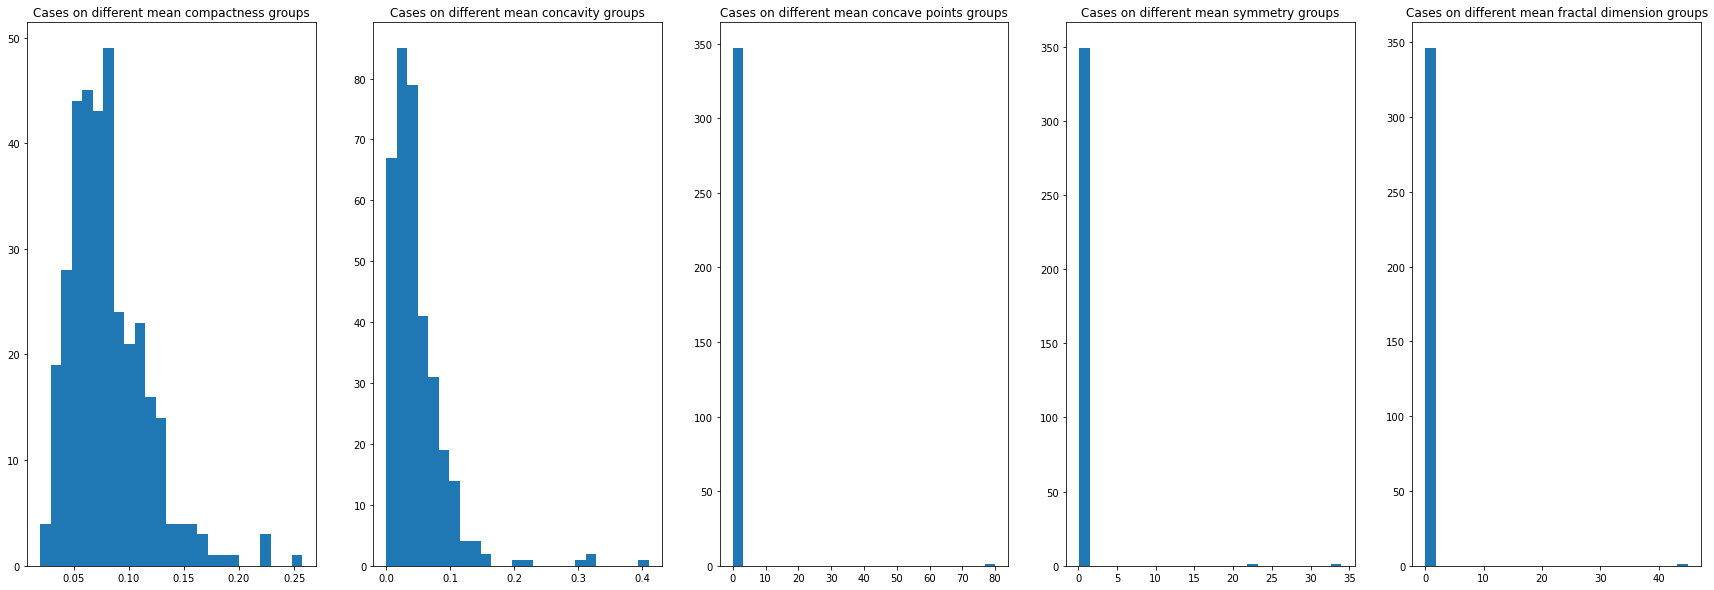

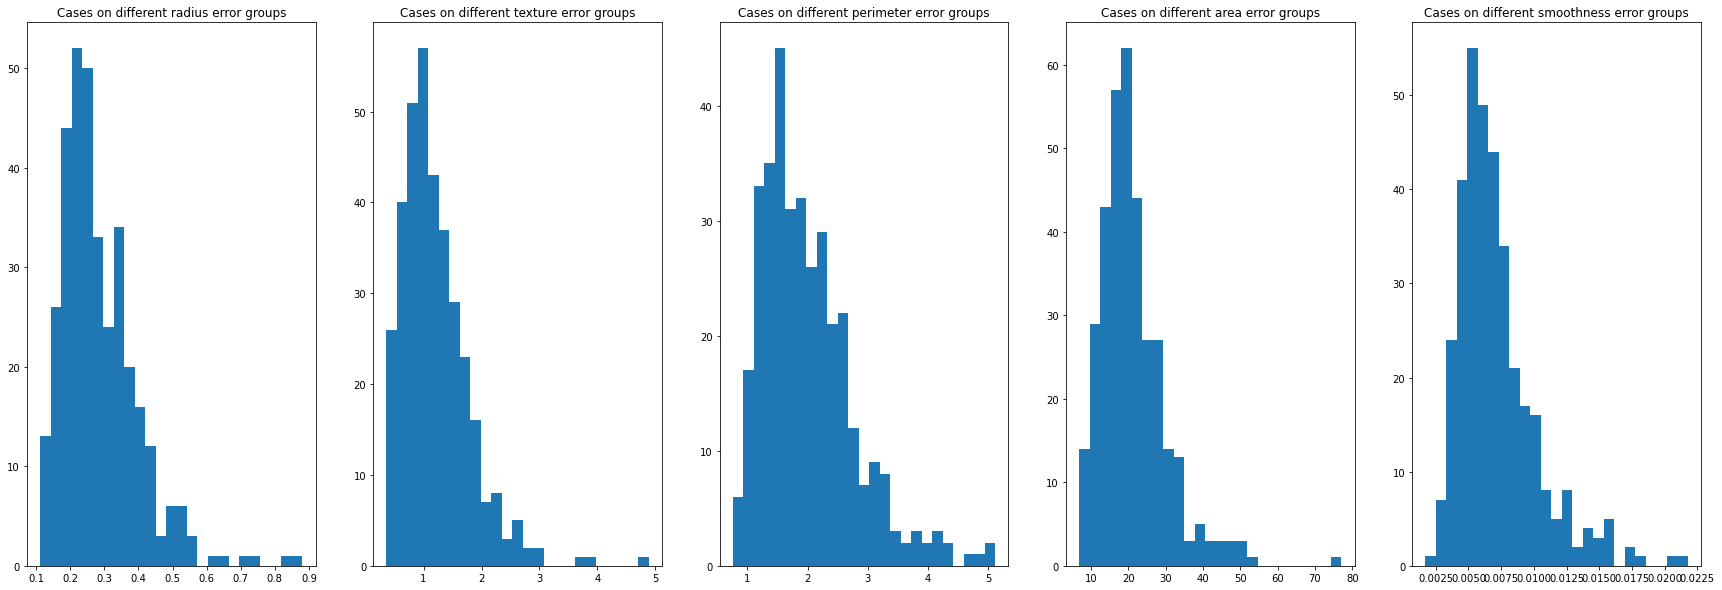

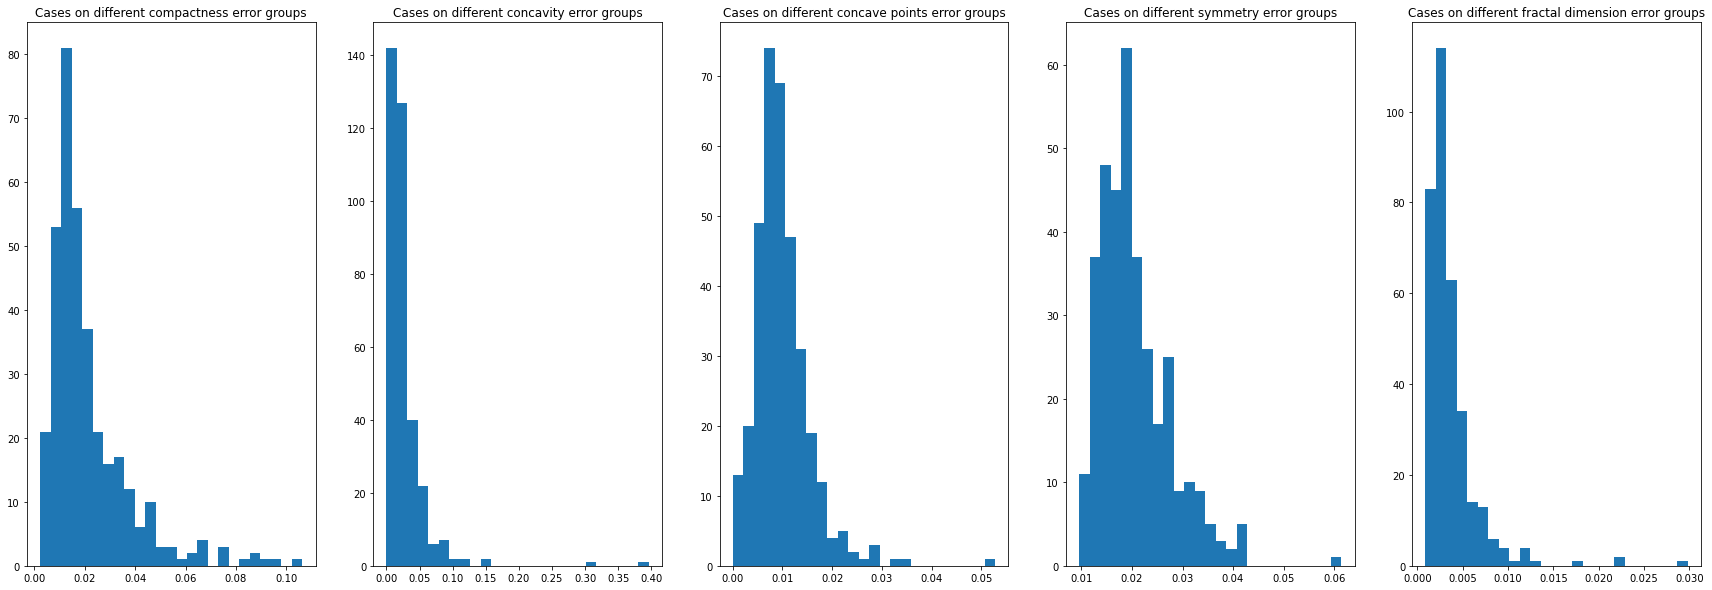

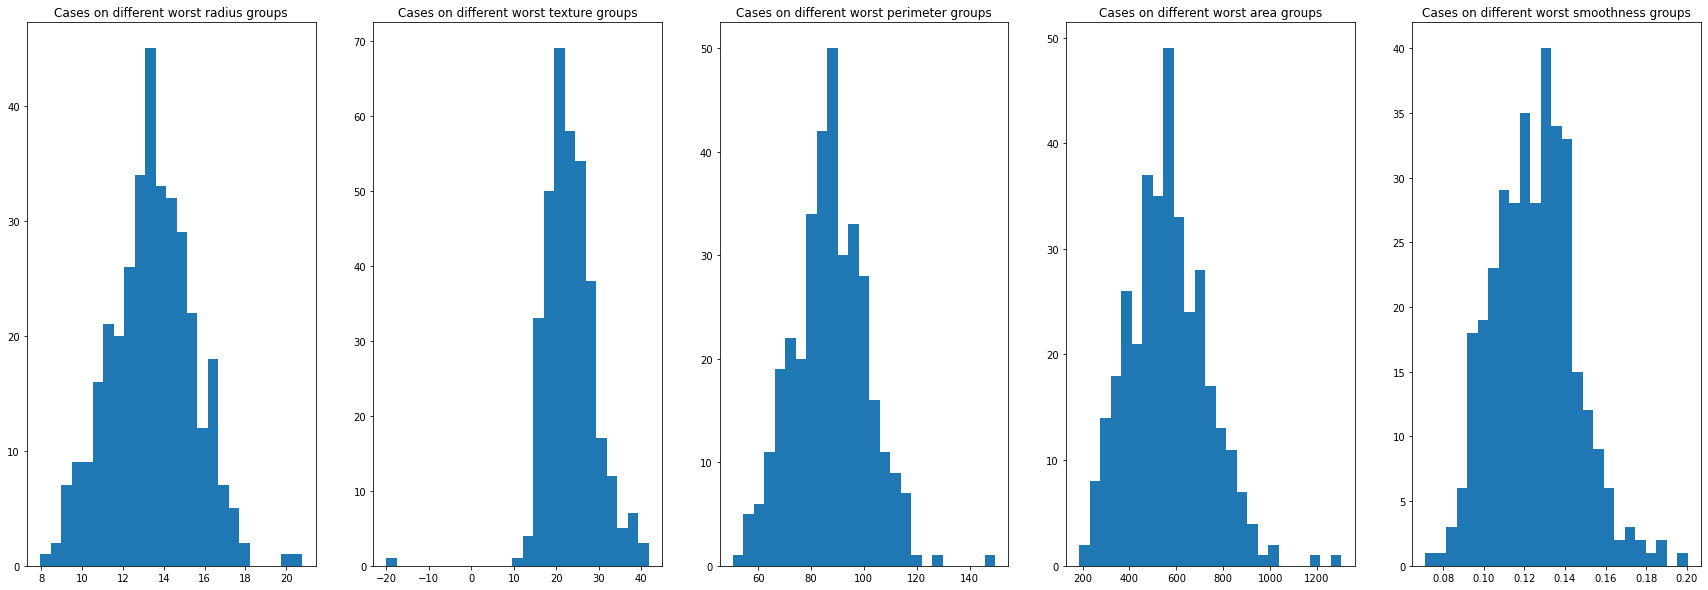

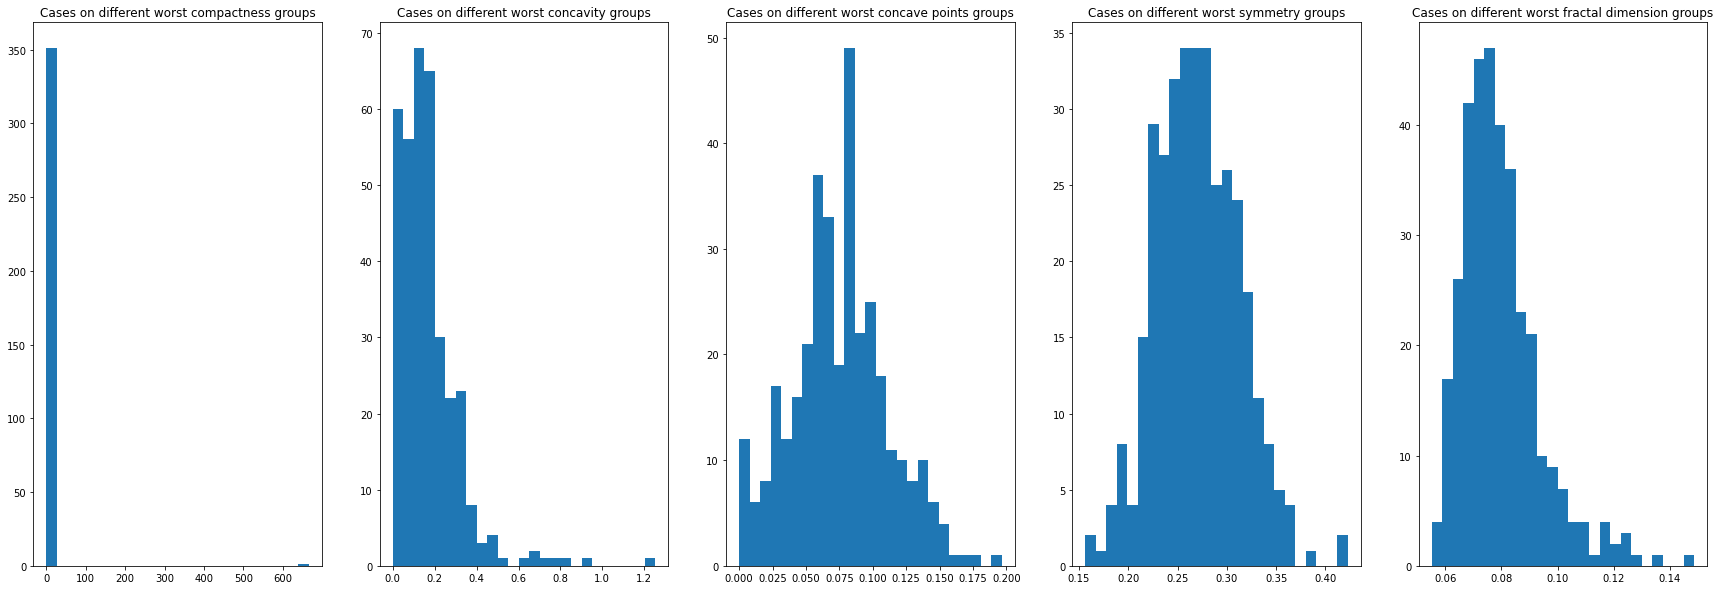

In [90]:
# Almacenamos en la variable pacientes a los que contienen cancer

# Para este caso consideraremos que el valor de 5 hace referencia a que hay presencia de cancer, el objetivo es mantener binarios lo datos

for condicion in df_cancer['target']:
    if condicion == 5:
        print('Valor anomalo corregido')
        df_cancer['target'][130]=1

plt.hist(df_cancer['target'])
plt.title('Distribucion de Cancer')
plt.grid()
plt.ylabel("Cantidad")
plt.show()
pacientes = df_cancer[df_cancer['target'] == 1]

fig, axs = plt.subplots(1, 5, figsize=(30, 10))
fig2, axs2 = plt.subplots(1, 5, figsize=(30, 10))
fig3, axs3  = plt.subplots(1,5,figsize=(30,10))
fig4, axs4  = plt.subplots(1,5,figsize=(30,10))
fig5, axs5  = plt.subplots(1,5,figsize=(30,10))
fig6, axs6  = plt.subplots(1,5,figsize=(30,10))

count = 0
for feature in ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']:
    axs[count].hist(pacientes[feature], bins=25)
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']:
    axs2[count].hist(pacientes[feature], bins=25)
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error']:
    axs3[count].hist(pacientes[feature], bins=25)
    axs3[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']:
    axs4[count].hist(pacientes[feature], bins=25)
    axs4[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness']:
    axs5[count].hist(pacientes[feature], bins=25)
    axs5[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']:
    axs6[count].hist(pacientes[feature], bins=25)
    axs6[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()

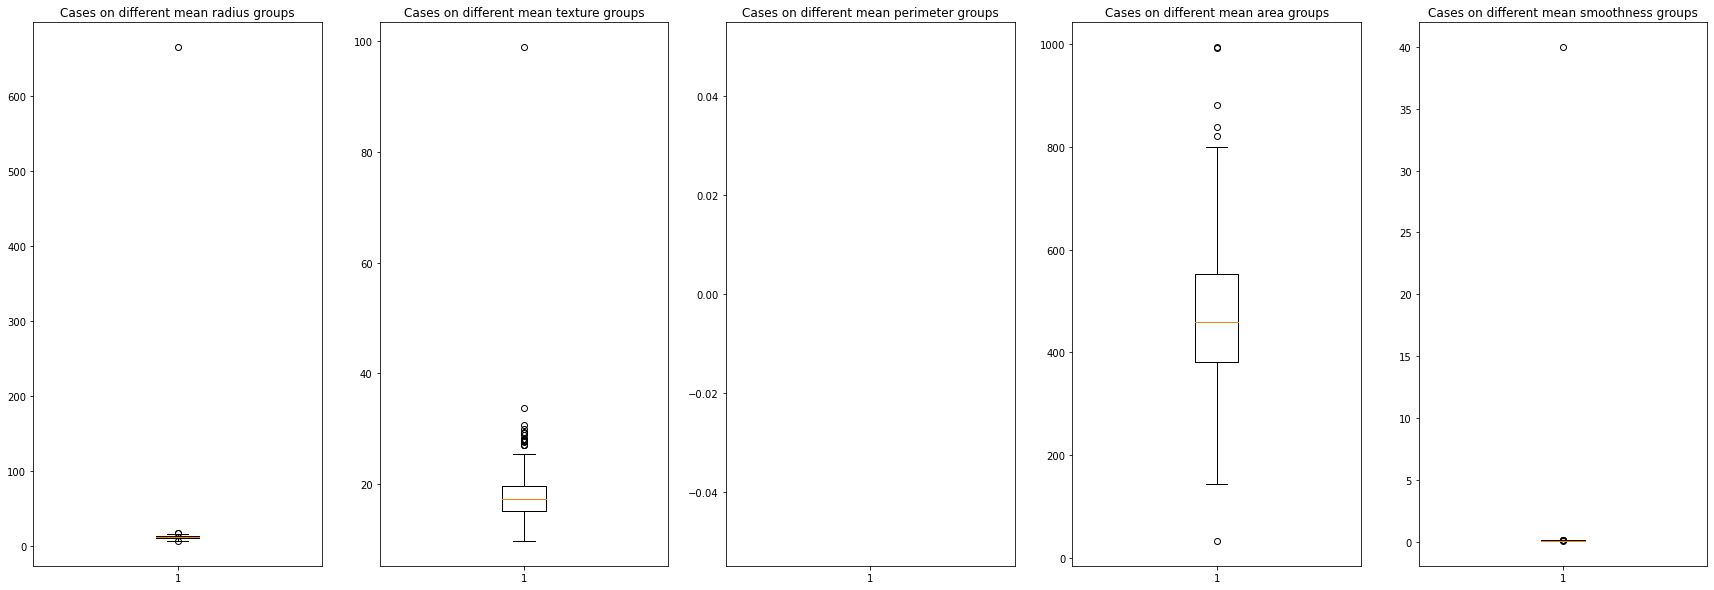

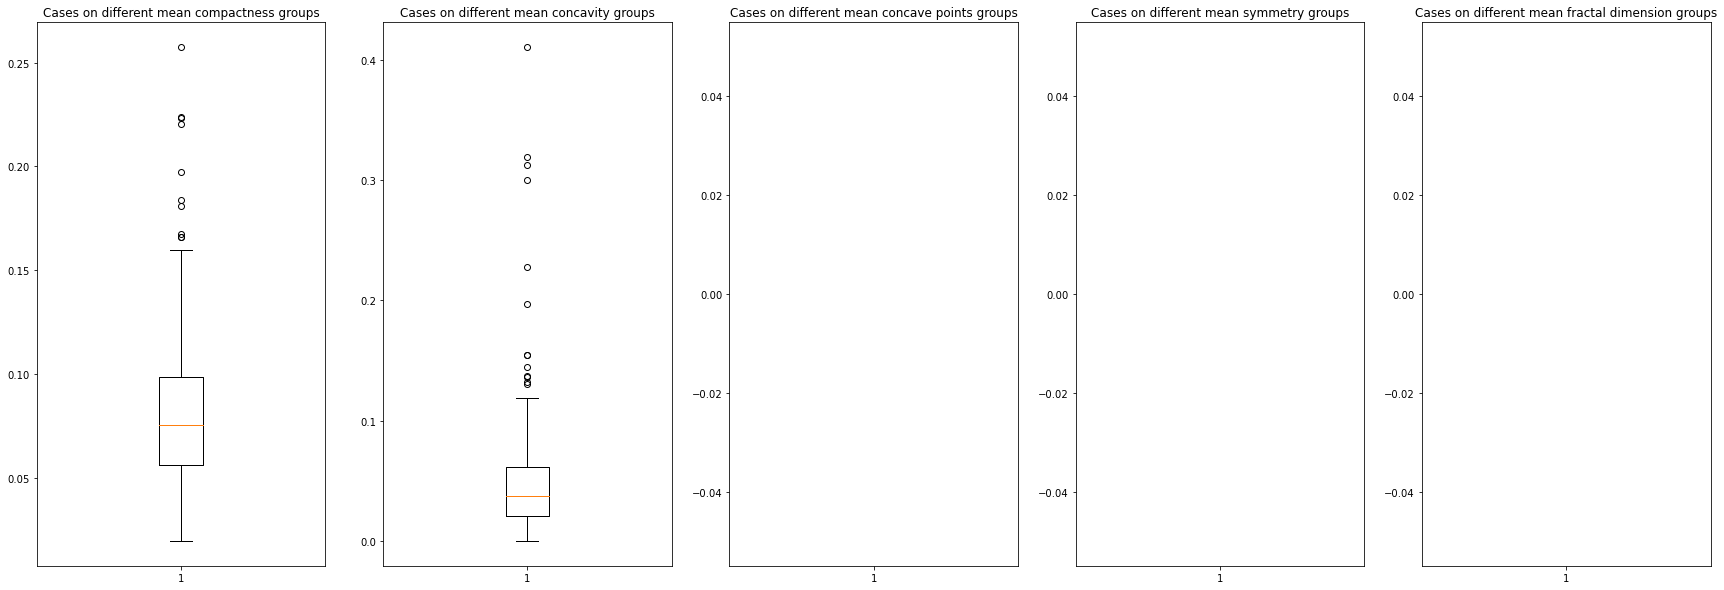

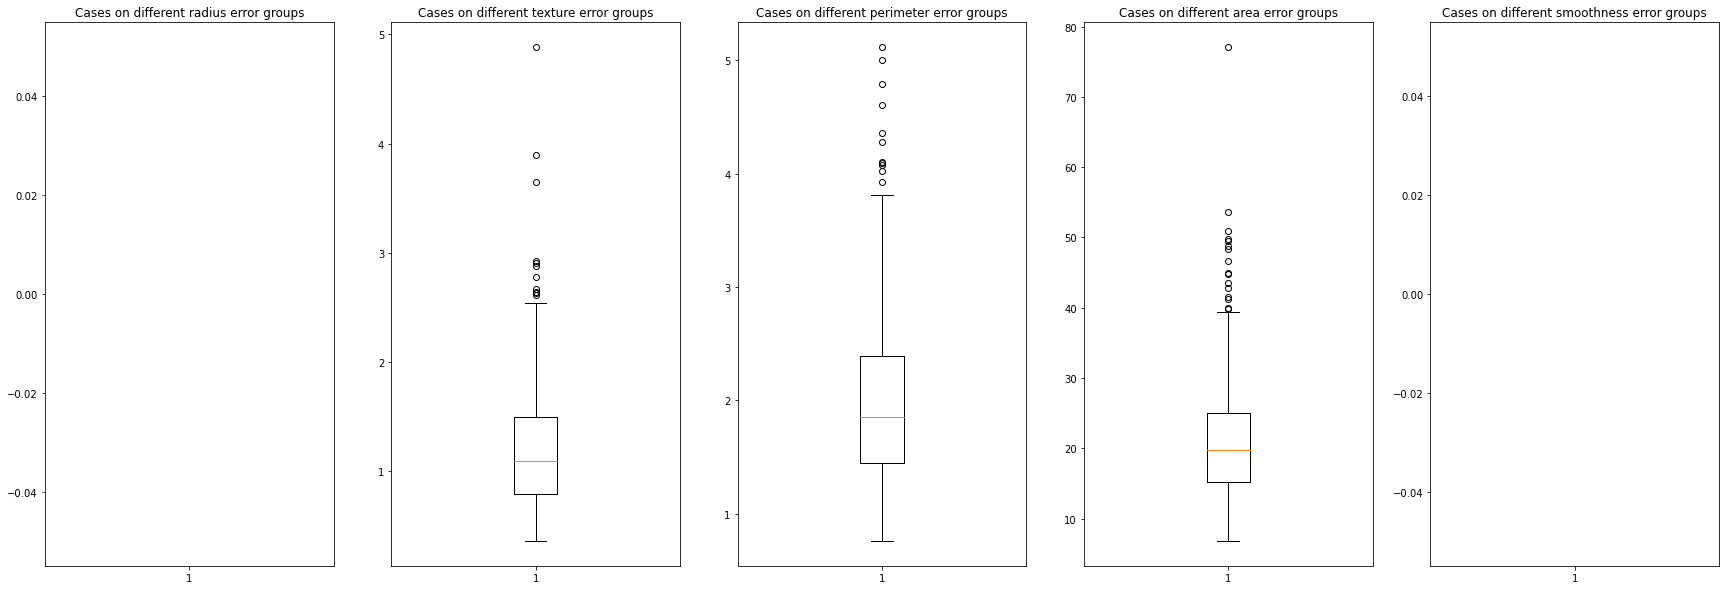

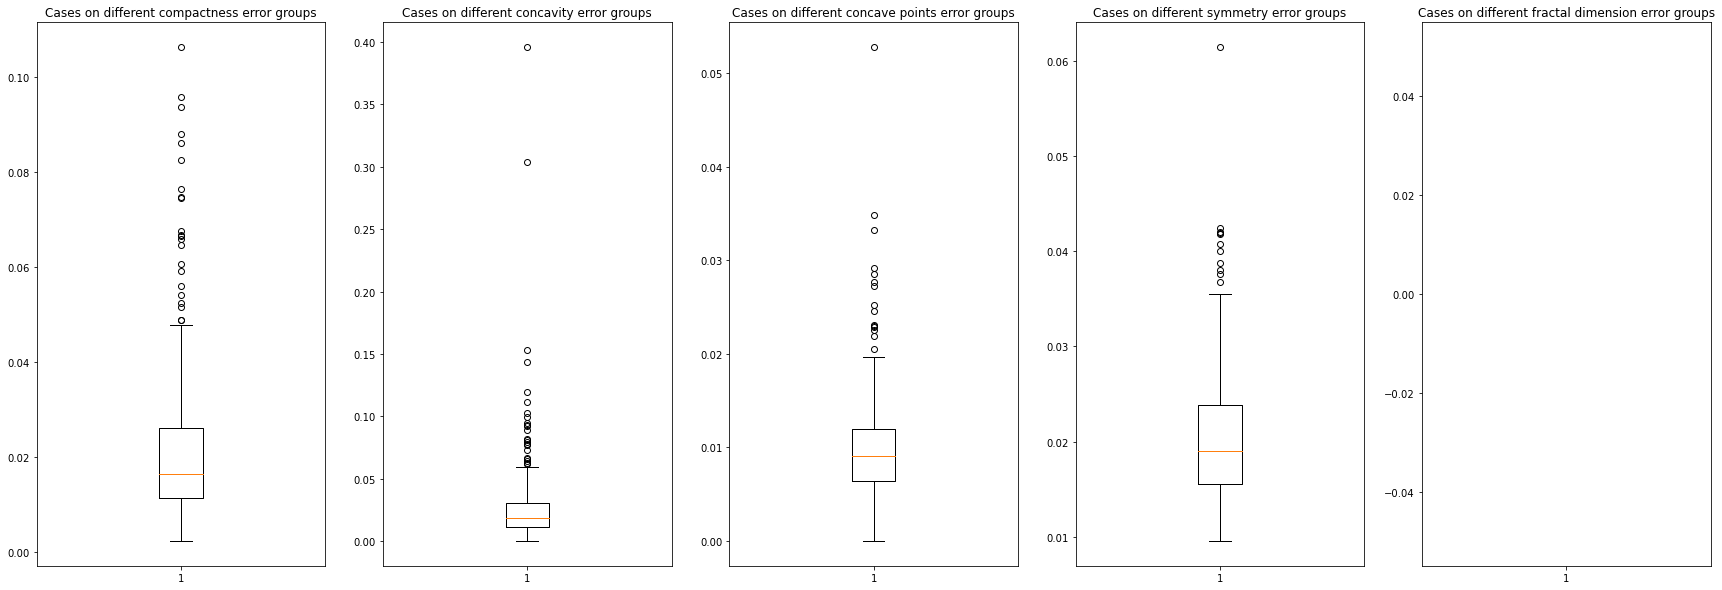

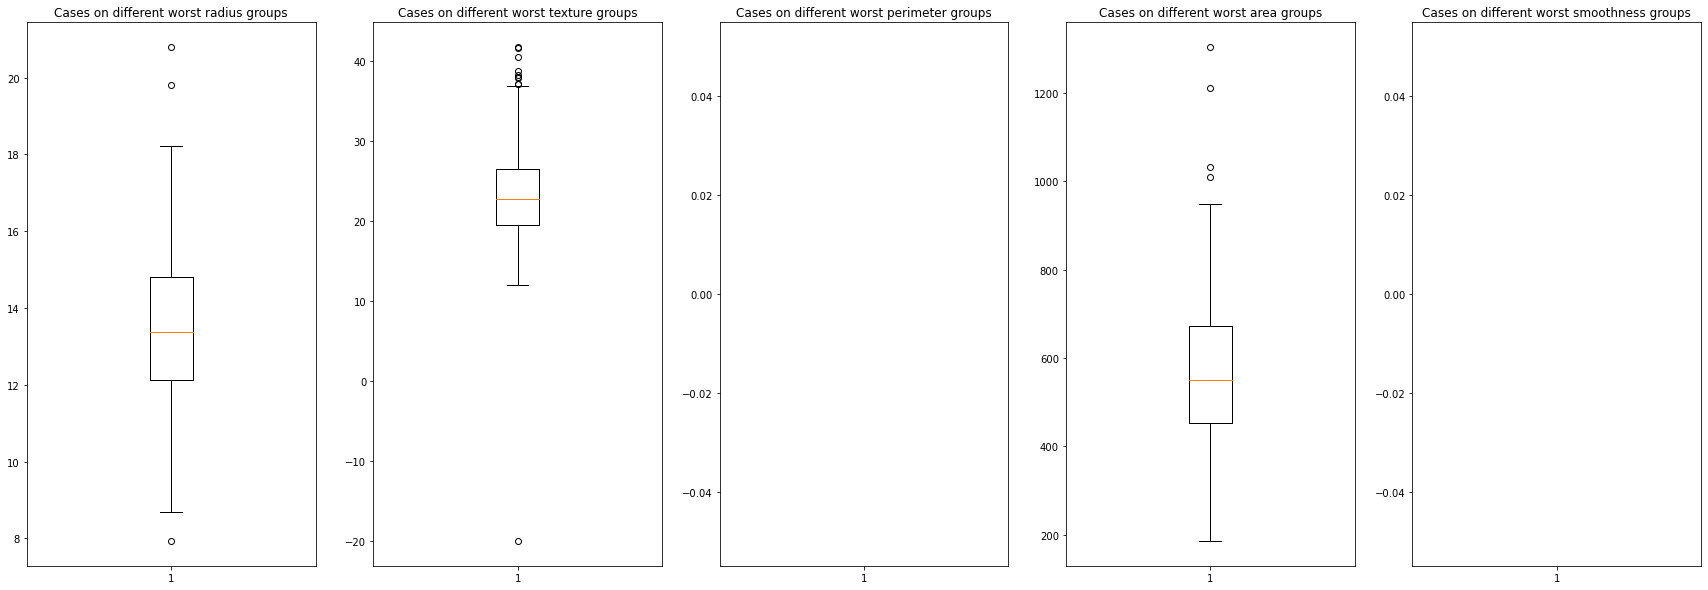

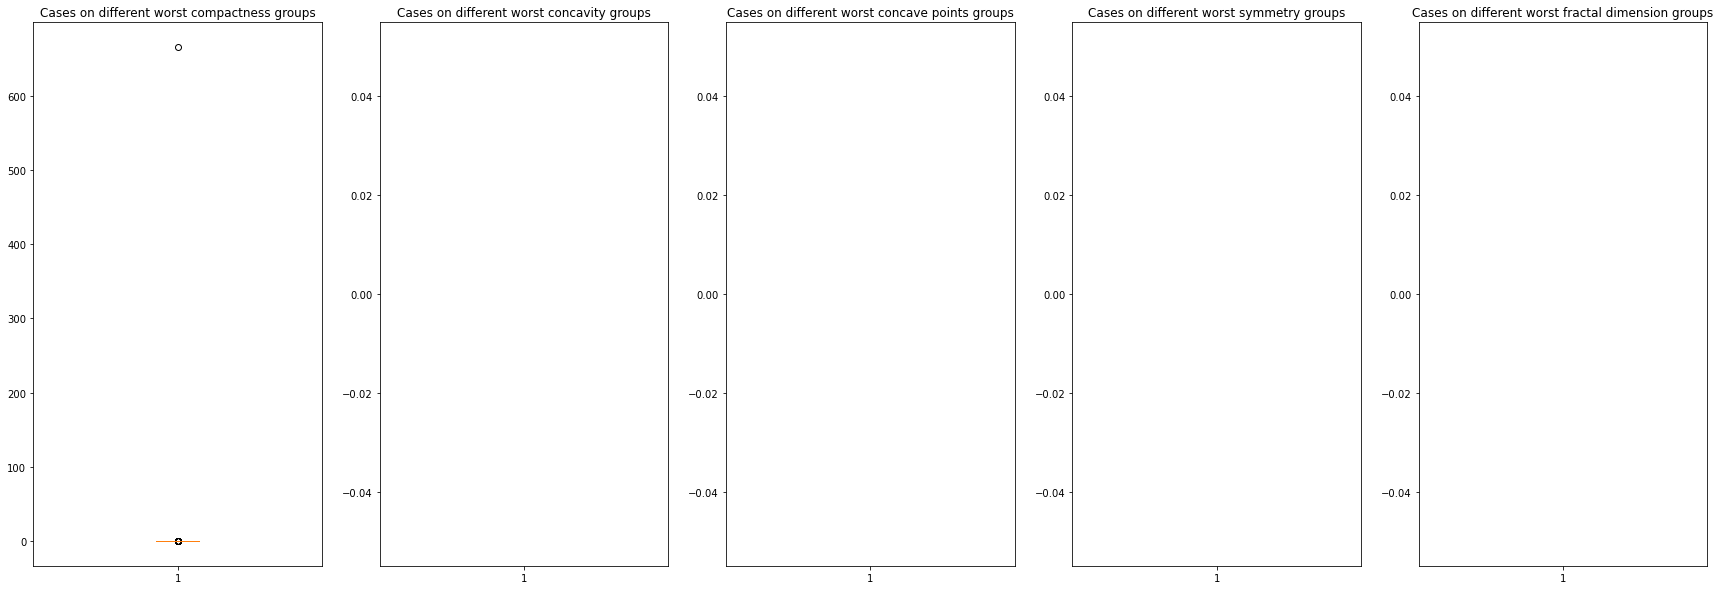

In [91]:
fig, axs = plt.subplots(1, 5, figsize=(30, 10))
fig2, axs2 = plt.subplots(1, 5, figsize=(30, 10))
fig3, axs3  = plt.subplots(1,5,figsize=(30,10))
fig4, axs4  = plt.subplots(1,5,figsize=(30,10))
fig5, axs5  = plt.subplots(1,5,figsize=(30,10))
fig6, axs6  = plt.subplots(1,5,figsize=(30,10))

count = 0
for feature in ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']:
    axs[count].boxplot(pacientes[feature])
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']:
    axs2[count].boxplot(pacientes[feature])
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error']:
    axs3[count].boxplot(pacientes[feature])
    axs3[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']:
    axs4[count].boxplot(pacientes[feature])
    axs4[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness']:
    axs5[count].boxplot(pacientes[feature],)
    axs5[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']:
    axs6[count].boxplot(pacientes[feature])
    axs6[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()


<AxesSubplot:>

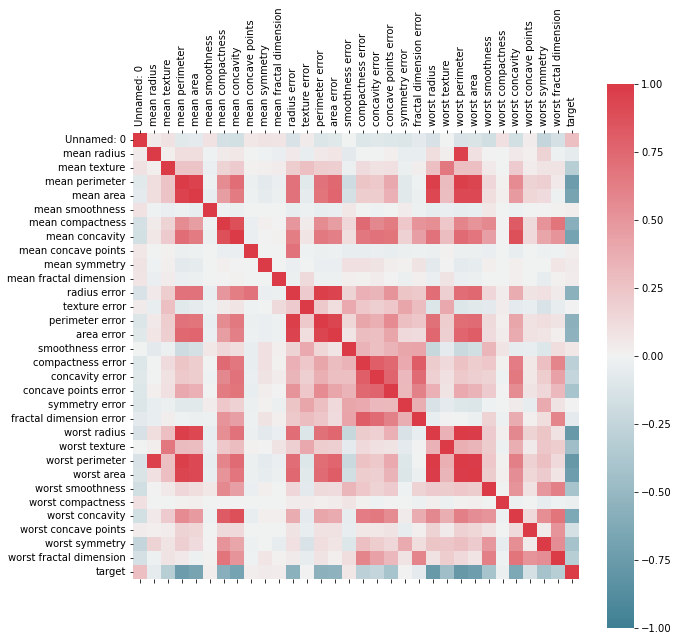

In [92]:
import seaborn as sns
#plt.matshow(df_heart.corr())
#plt.show()
#
corr = df_cancer.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

## Pre-procesamiento

### Imputación de valores NaN

La imputacion con la mediana puede ser una estrategia razonable en muchos casos. La mediana es menos sensible a valores atípicos en comparación con la media, lo que puede hacer que sea una opción más robusta en situaciones donde tienes outliers o datos dispersos.

In [93]:
df_cancer = df_cancer.fillna(df_cancer.median())
print(df_cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

### Eliminación de outliers

Analizando los gráficos mostrados anteriormente, resulta conveniente la eliminación de outliers que perjudican el tratamiento adecuado de los datos- Estos outliers están presentes en las siguientes características:
Para el tratamienot de los outliers aplicamos la relación porporcionada en clase que indica que se consideran a los valores fuera del intervalo: (Q1 - 3 x IQR, Q3 + 3 x IQR) Como outliers
Los outliers identificados son los siguientes:

- Mean radius: valores mayores a 600
- Mean texture: Valores mayores a 90
- Mean smoothness: Valores mayores a 35
- Mean compactness: Valores mayores a 0.25
- Mean concavity: Valores mayores a 0.4
- Texture error: Valores mayores a 4
- Area error: Valores mayores a 70
- Compactness error: Valores mayor a 0.10
- Concavity error: Valores mayores a 0.25
- Concave points error: Valores mayores a 0.04
- Symmetry error: Valores mayores a 0.05
- Worst radius: Valores menores a 8
- Worst texture: Valores menores a -10
- Worst compactness: Valores mayores a 600

6) Ejecuta la limpieza de datos según el criterio analizado previamente. Evalua la cantidad de datos crudos vs la cantidad de datos que quedan posterior a la limpieza.

In [94]:
print('Data size before cleaning: ', len(df_cancer))
df_cancer_clean = df_cancer[(df_cancer['mean radius'] < 200) &
                         (df_cancer['mean texture'] < 90) & (df_cancer['mean smoothness']<0.15) & (df_cancer['mean compactness']<0.25) & (df_cancer['mean concavity']<0.25) & (df_cancer['mean concave points']<10) & (df_cancer['mean symmetry']<15) &(df_cancer['texture error']<4) & (df_cancer['area error']<70) &
                         (df_cancer['compactness error']<0.10) & (df_cancer['concavity error']<0.25) & (df_cancer['symmetry error']<0.05) & (df_cancer['worst radius']>8) & (df_cancer['worst texture']>-10) & (df_cancer['worst compactness']<400)&(df_cancer['area error']<60) & (df_cancer['mean fractal dimension']<30)&(df_cancer['fractal dimension error']<0.015)]
print('Data size after cleaning: ', len(df_cancer_clean))

Data size before cleaning:  569
Data size after cleaning:  439


### Muestra de datos procesados

A continuación se muestras los datos con el procesamiento realizado.

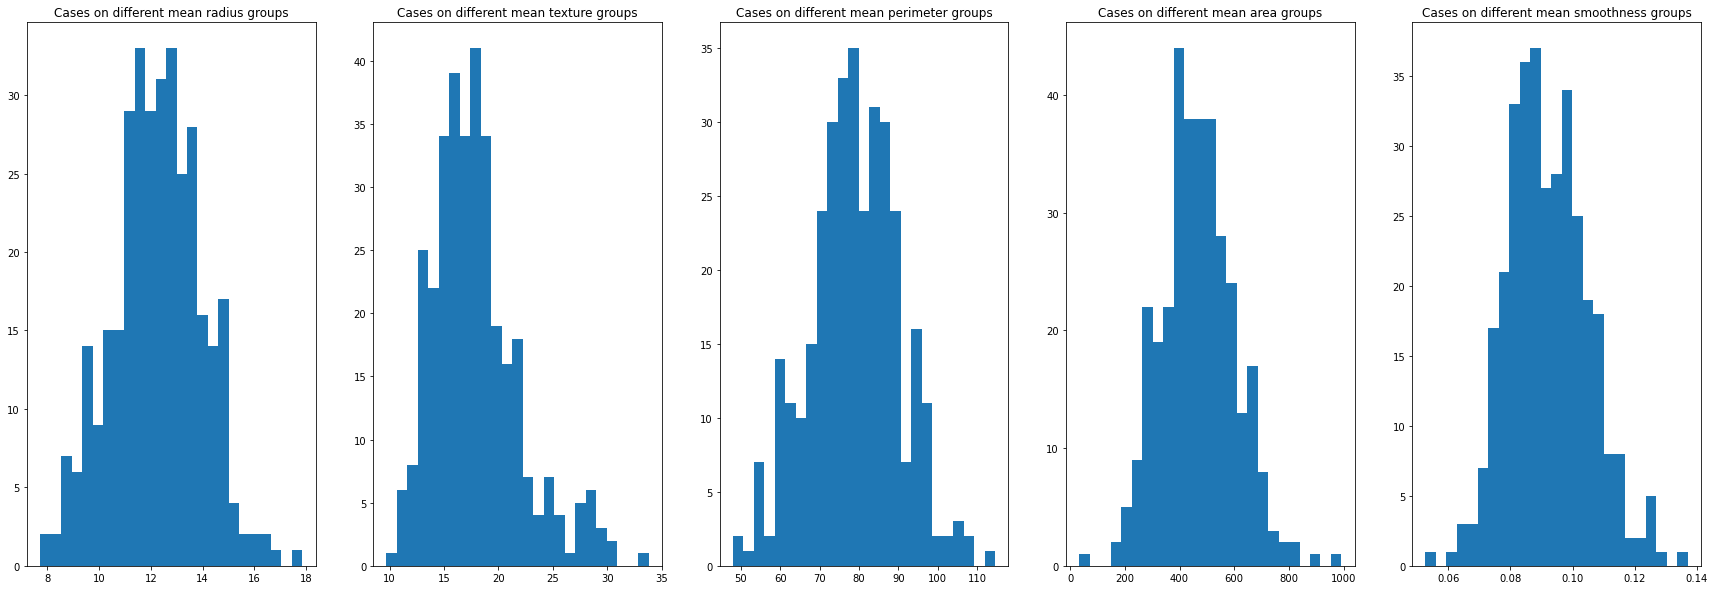

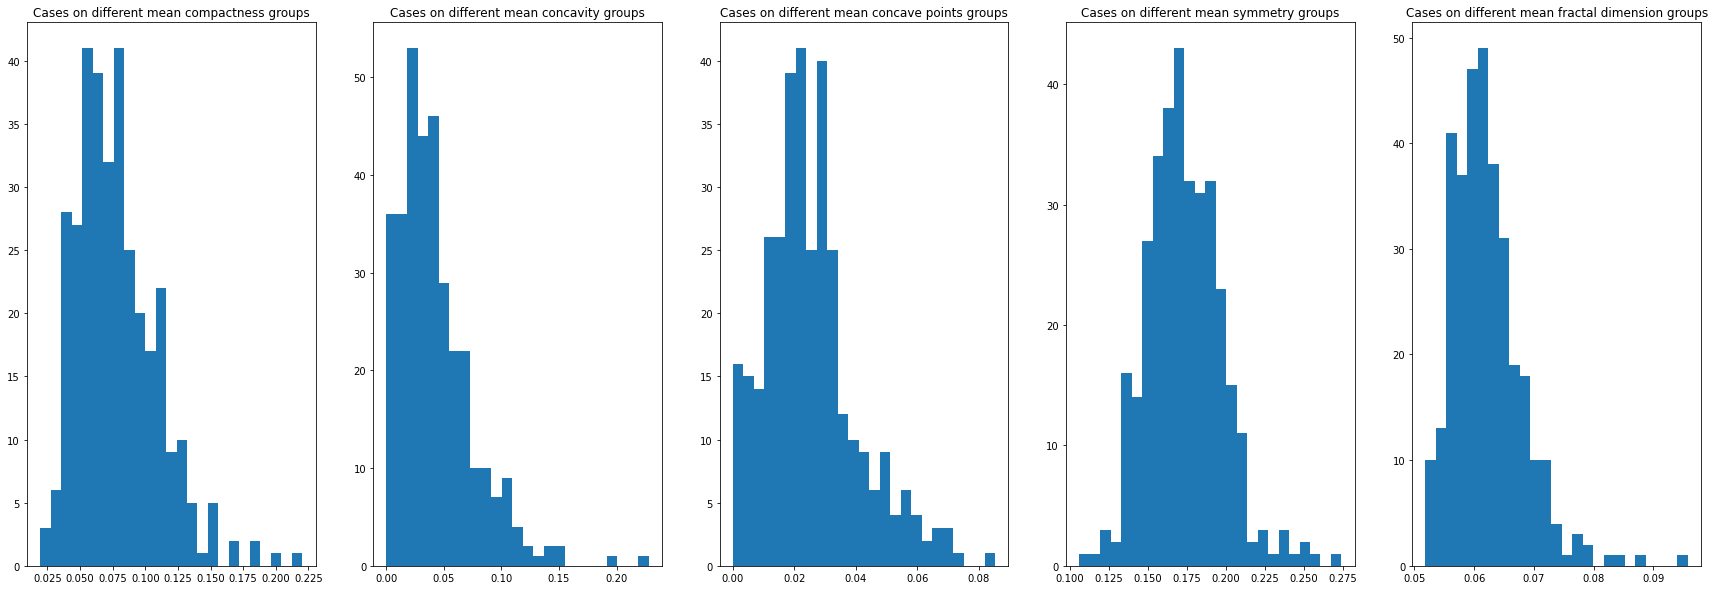

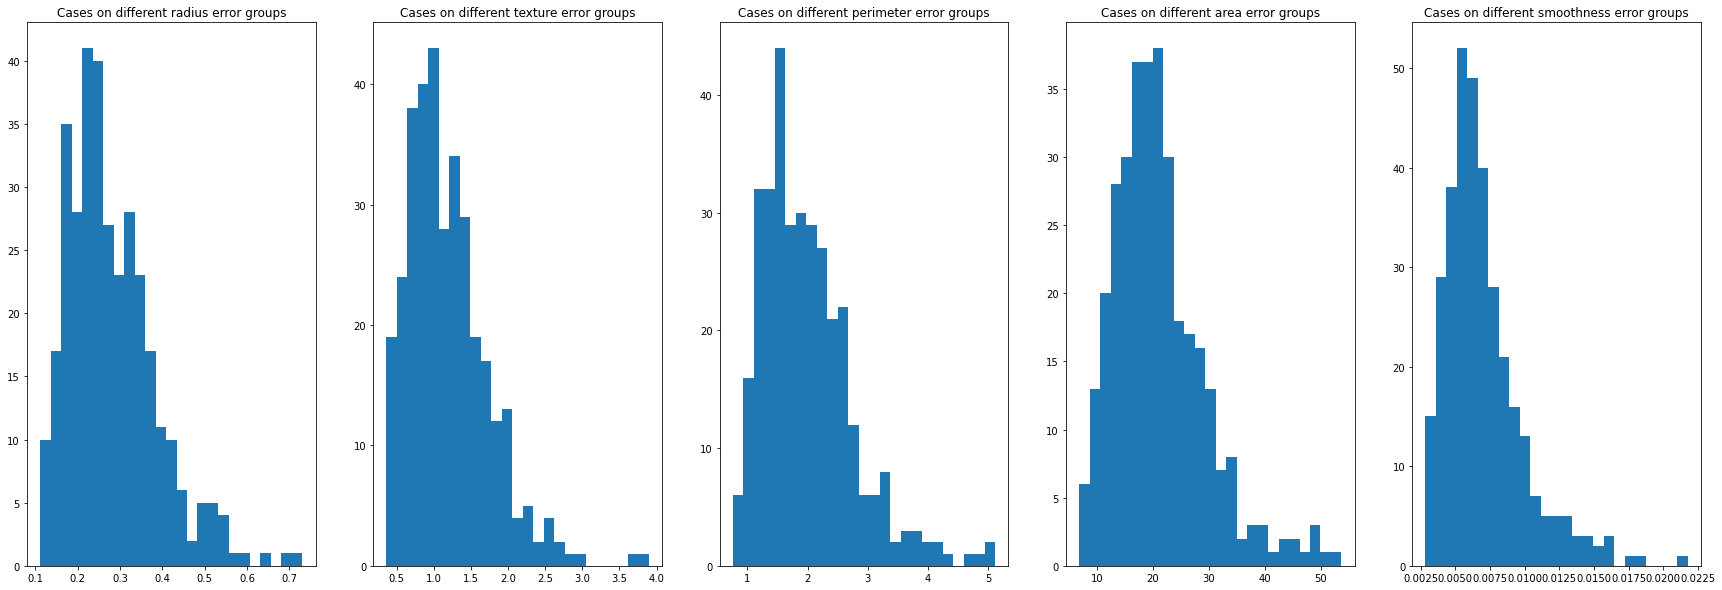

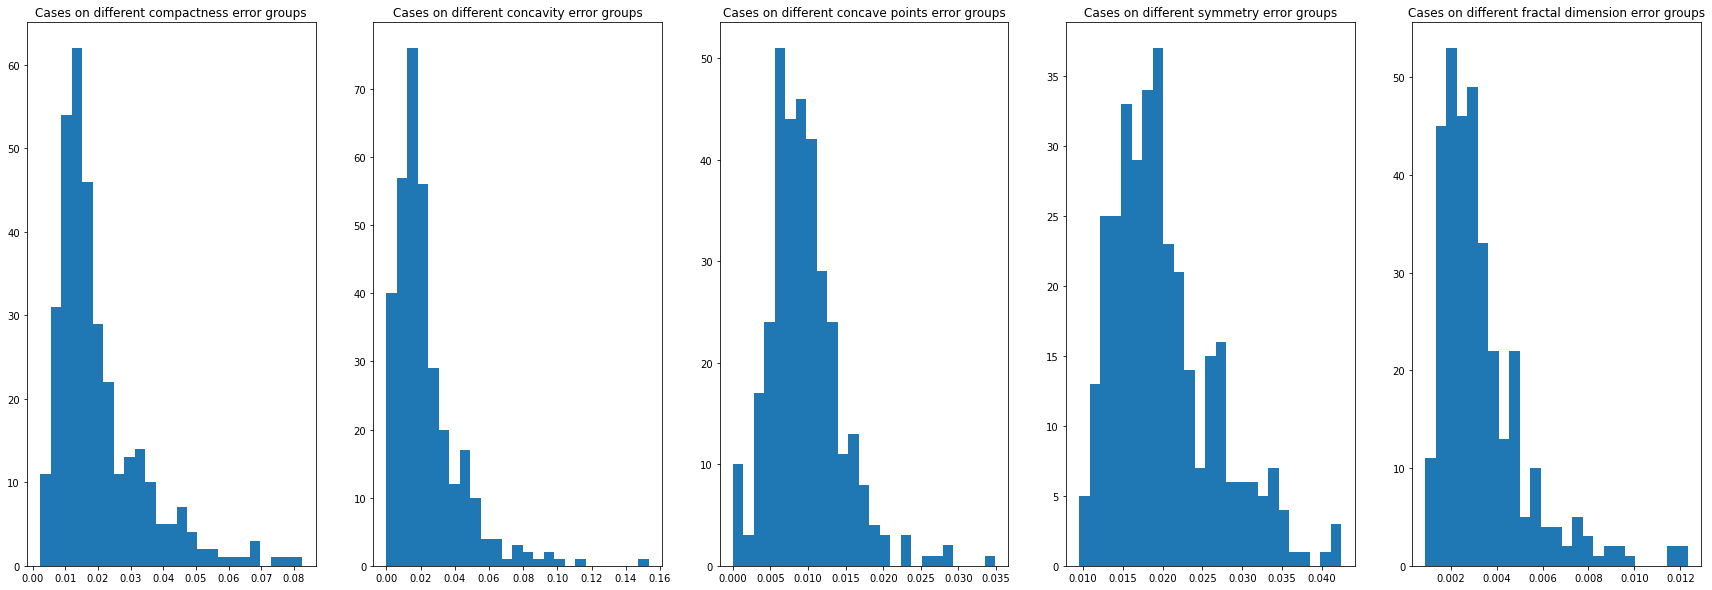

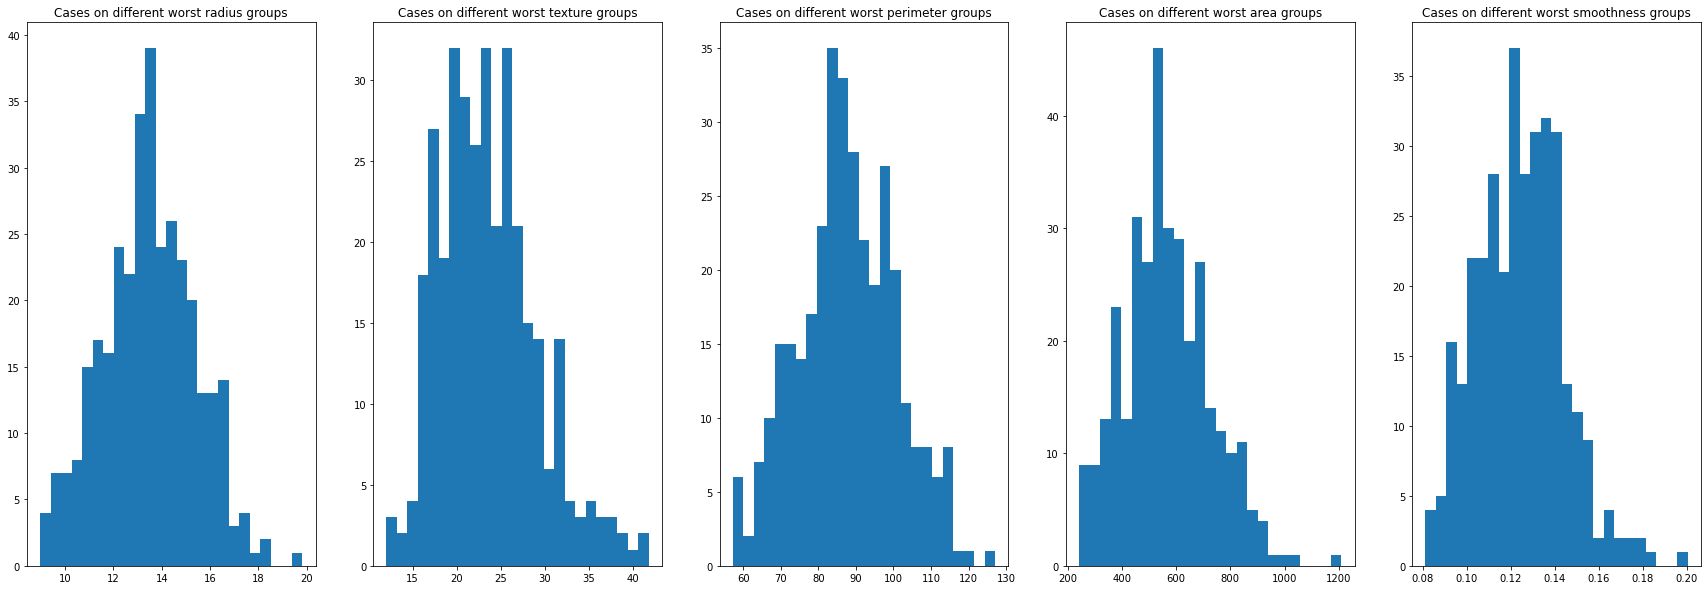

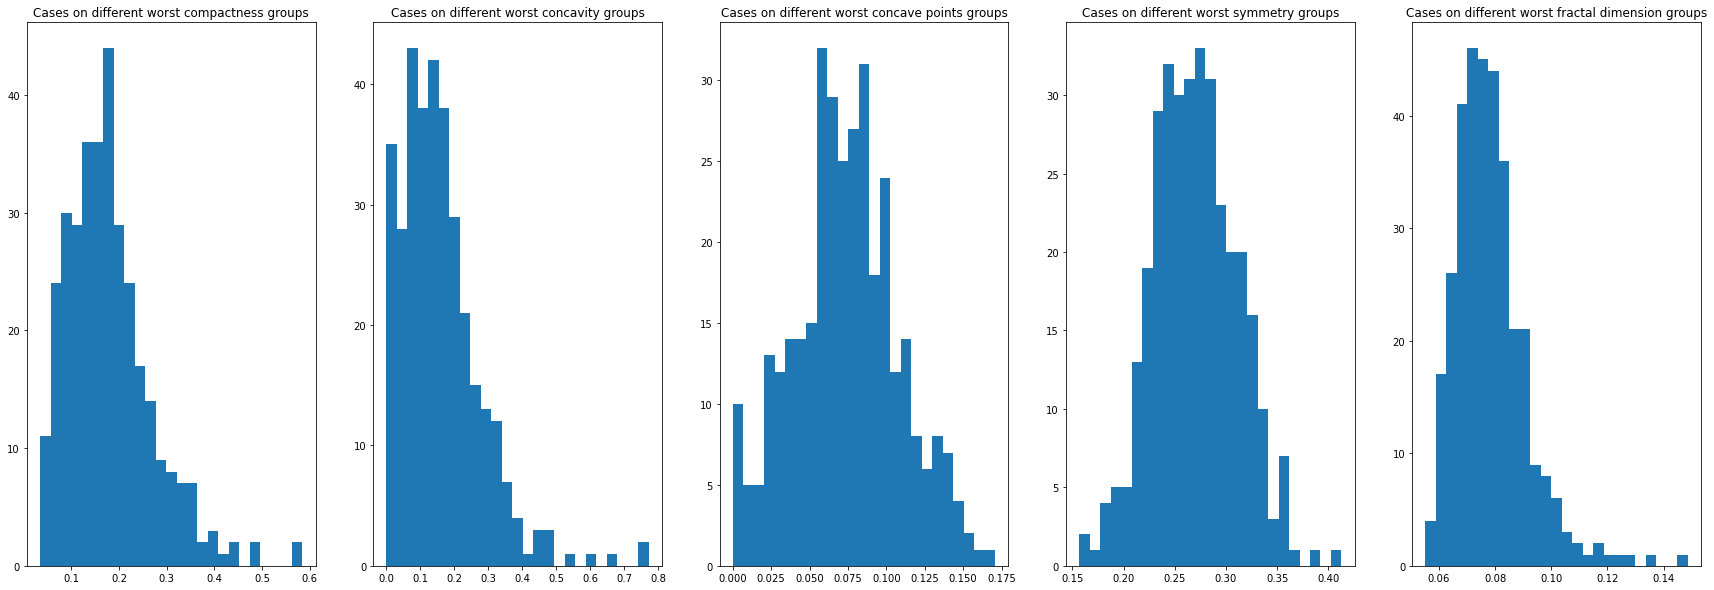

In [95]:
pacientes = df_cancer_clean[df_cancer_clean['target'] == 1]

fig, axs = plt.subplots(1, 5, figsize=(30, 10))
fig2, axs2 = plt.subplots(1, 5, figsize=(30, 10))
fig3, axs3  = plt.subplots(1,5,figsize=(30,10))
fig4, axs4  = plt.subplots(1,5,figsize=(30,10))
fig5, axs5  = plt.subplots(1,5,figsize=(30,10))
fig6, axs6  = plt.subplots(1,5,figsize=(30,10))

count = 0
for feature in ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']:
    axs[count].hist(pacientes[feature], bins=25)
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']:
    axs2[count].hist(pacientes[feature], bins=25)
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error']:
    axs3[count].hist(pacientes[feature], bins=25)
    axs3[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']:
    axs4[count].hist(pacientes[feature], bins=25)
    axs4[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness']:
    axs5[count].hist(pacientes[feature], bins=25)
    axs5[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']:
    axs6[count].hist(pacientes[feature], bins=25)
    axs6[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()

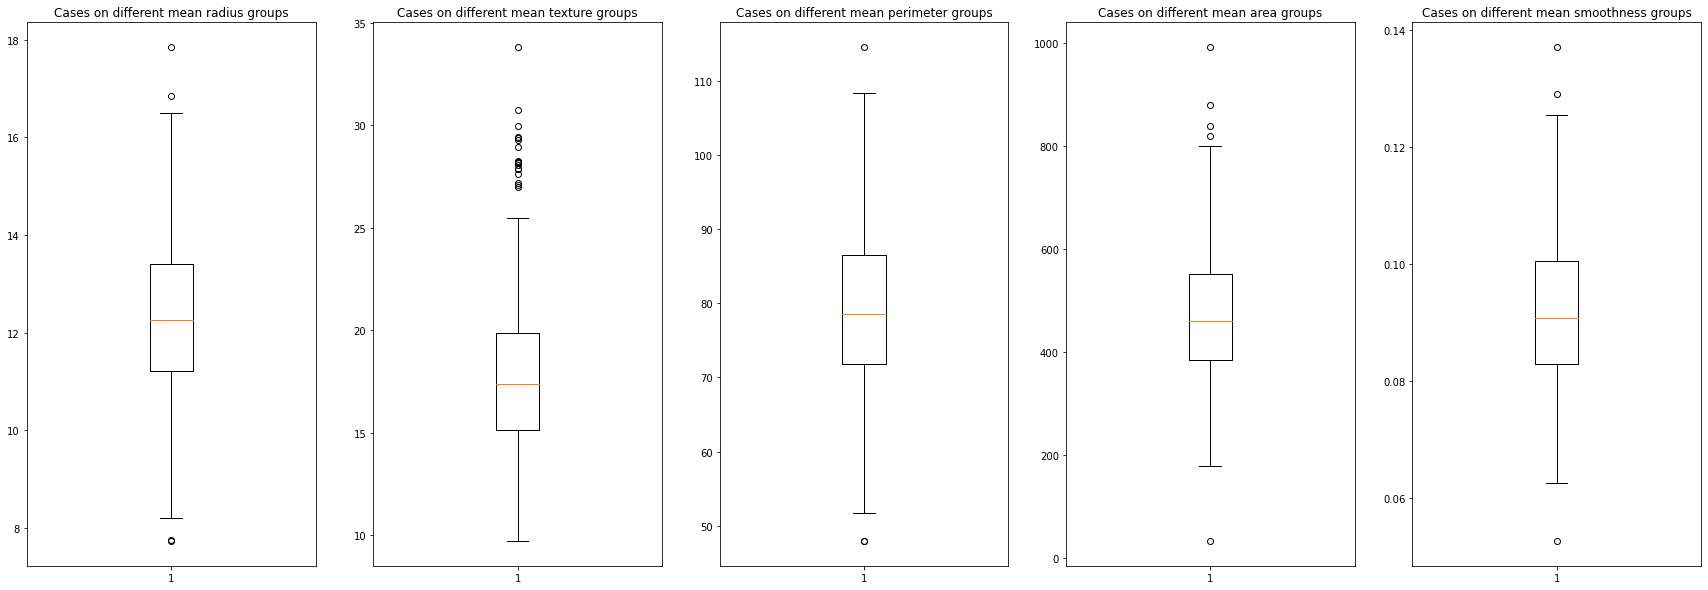

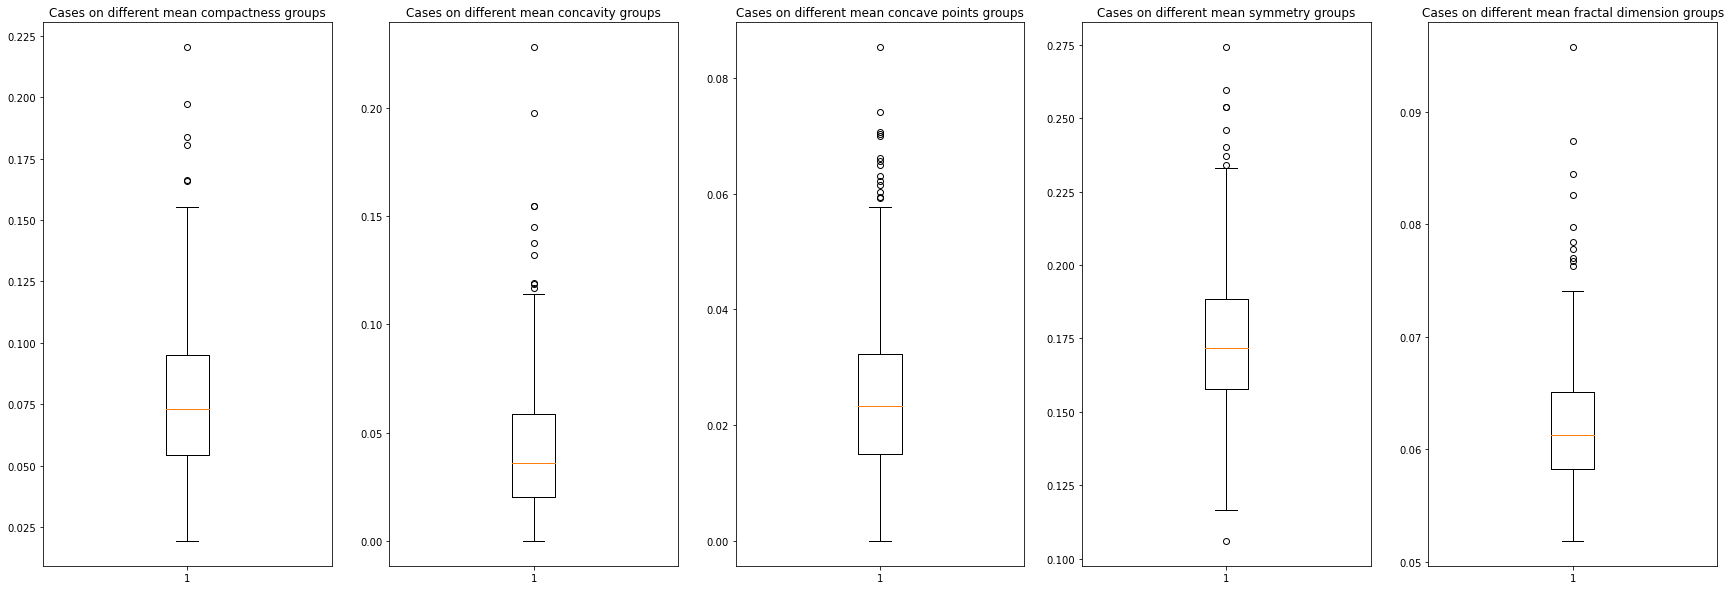

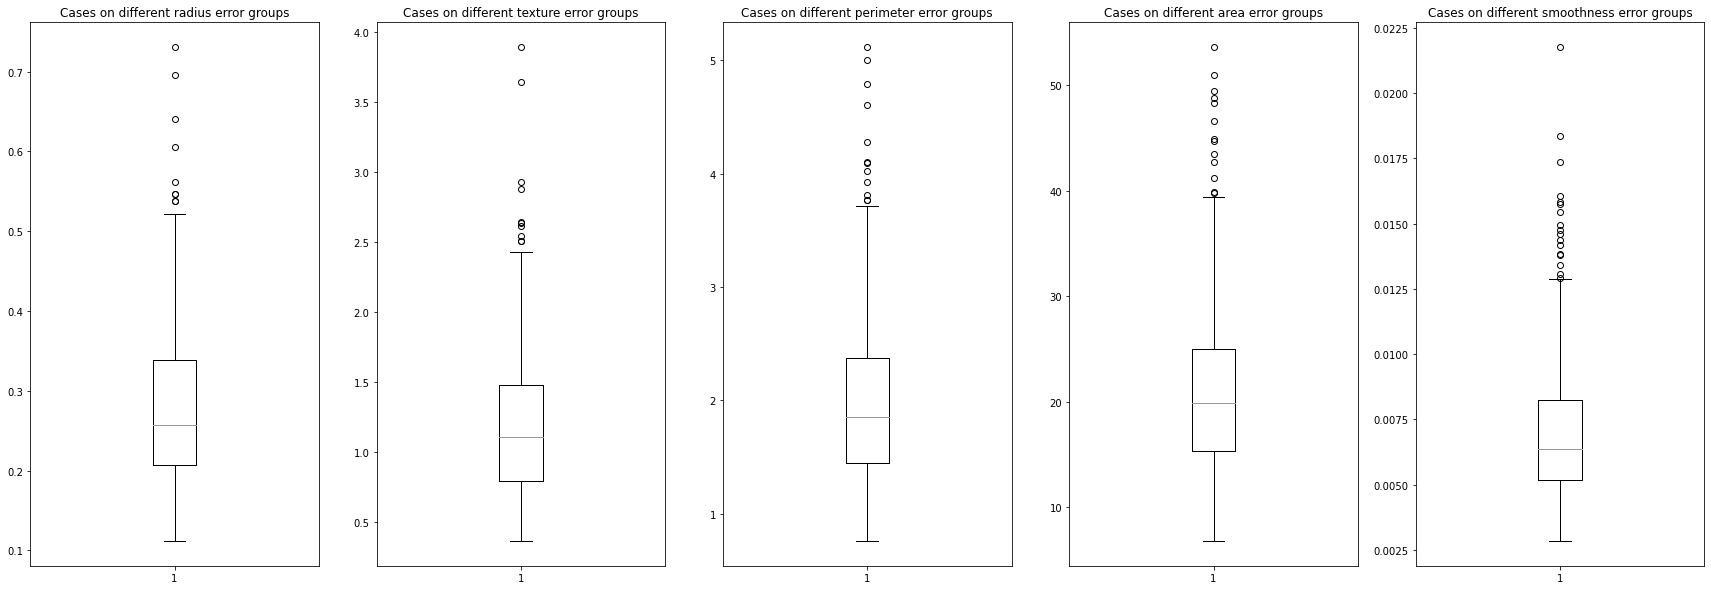

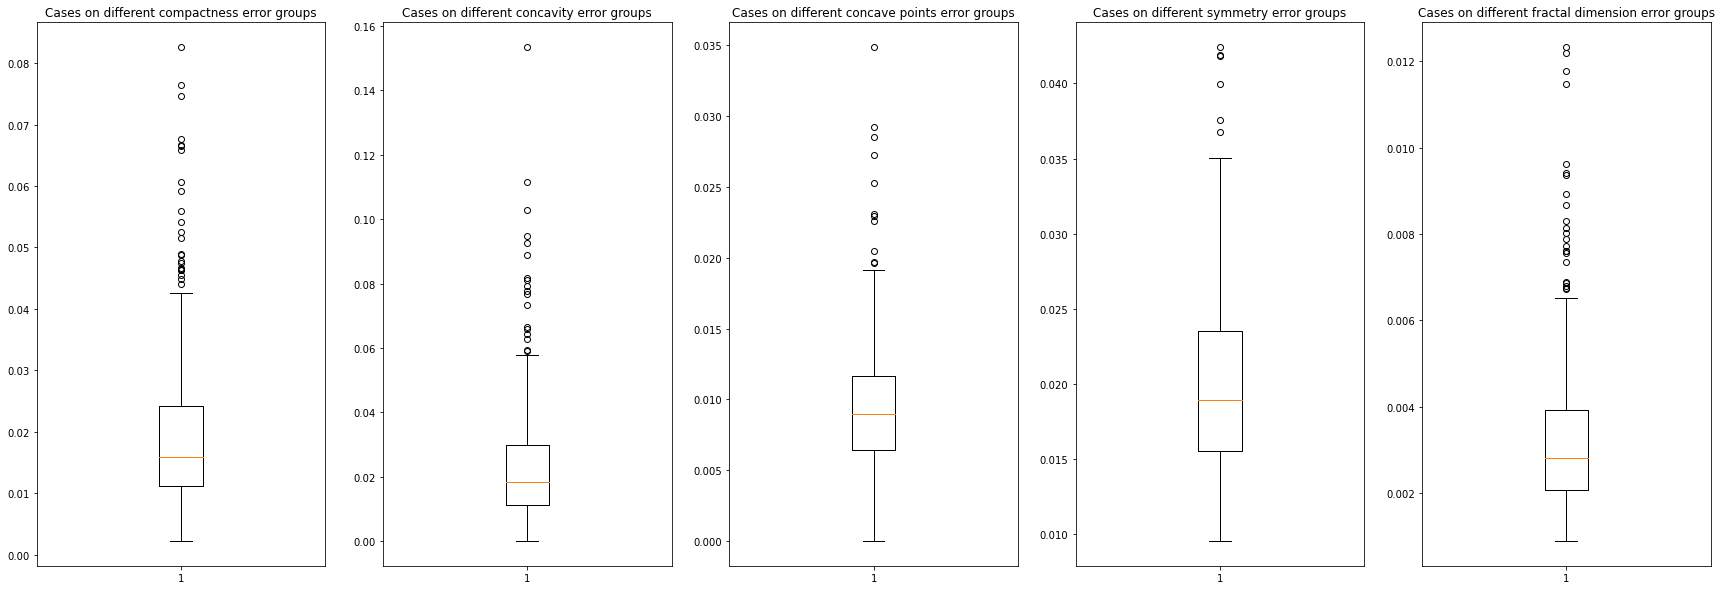

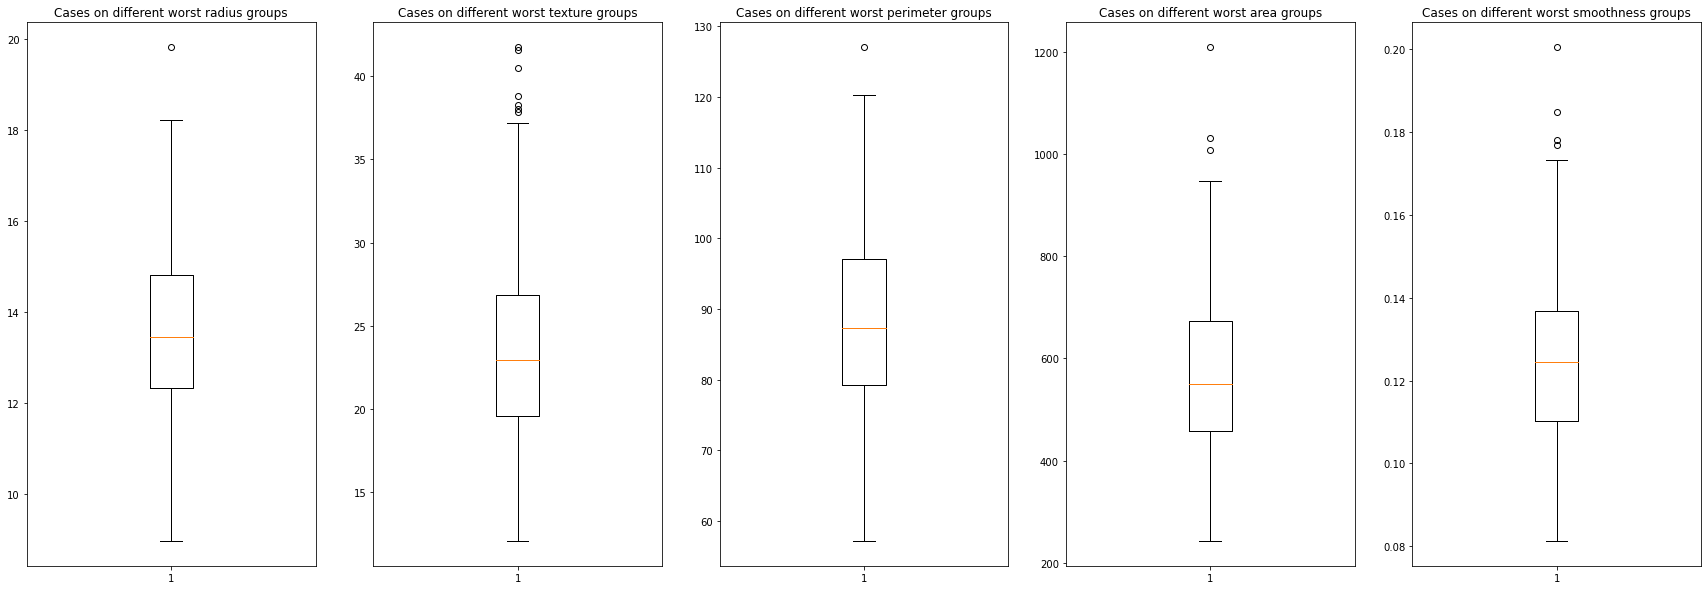

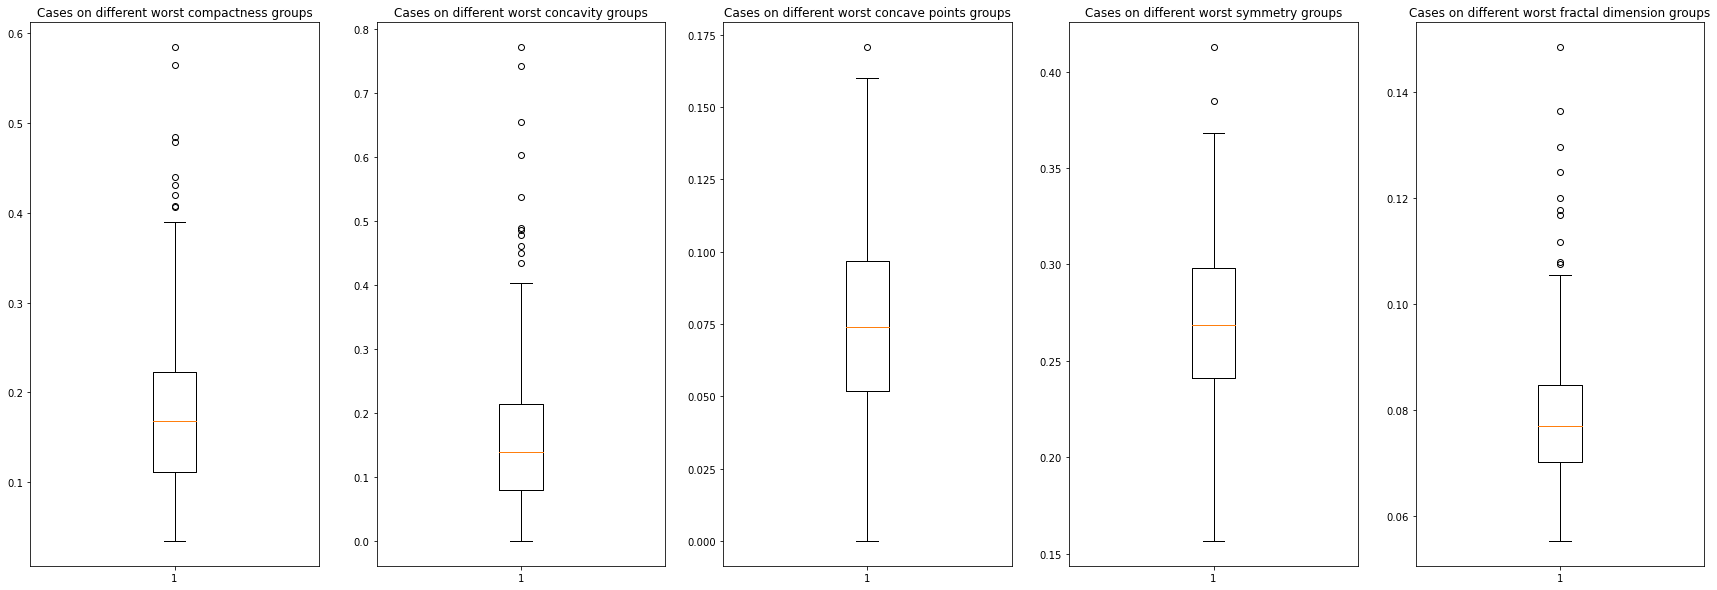

In [96]:
fig, axs = plt.subplots(1, 5, figsize=(30, 10))
fig2, axs2 = plt.subplots(1, 5, figsize=(30, 10))
fig3, axs3  = plt.subplots(1,5,figsize=(30,10))
fig4, axs4  = plt.subplots(1,5,figsize=(30,10))
fig5, axs5  = plt.subplots(1,5,figsize=(30,10))
fig6, axs6  = plt.subplots(1,5,figsize=(30,10))

count = 0
for feature in ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']:
    axs[count].boxplot(pacientes[feature])
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']:
    axs2[count].boxplot(pacientes[feature])
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error']:
    axs3[count].boxplot(pacientes[feature])
    axs3[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']:
    axs4[count].boxplot(pacientes[feature])
    axs4[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness']:
    axs5[count].boxplot(pacientes[feature],)
    axs5[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']:
    axs6[count].boxplot(pacientes[feature])
    axs6[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()

En los dos últimos gráficos, que corresponden a un histograma y boxplot para la distribución de datos. Podemos observar que los outliers han sido removidos exitosamente. Ahora el dataset resulta más adecuado para el análisis.

## Procesamiento y Modelamiento

Para esta etapa del trabajo es necesario primero descargar e importar la librería lazypredict. A partir de esta se obtendrán modelos junto a sus valores más característicos para así escoger el más conveniente.

In [97]:
# Descarga e importanción de lazypredict

!gdown https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy
!pip -q install lazypredict

'gdown' is not recognized as an internal or external command,
operable program or batch file.


### Escalamiento de los datos

Se utilizará un scaler para procesar la información. Para esto se trabajará con el dataset pre procesado almacenado en la variable df_cancer_clean.

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Separamos del dataset el target para posteriormente entrenar la red neuronal

X = df_cancer_clean.drop(['target'], axis=1)
y = df_cancer_clean['target']

data_normalized = scaler.fit_transform(X)

# Convertir el resultado a un nuevo dataframe
X = pd.DataFrame(data_normalized, columns=X.columns)

### Entrenamiento del dataset

Para entrenar la red neuronal se tomará al 20% de los datos como herramientas para la prueba. Esto se configura directamente en la función train_test_split()

In [99]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123, test_size=0.2)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 32.69it/s]

[LightGBM] [Info] Number of positive: 272, number of negative: 79
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3618
[LightGBM] [Info] Number of data points in the train set: 351, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.774929 -> initscore=1.236354
[LightGBM] [Info] Start training from score 1.236354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
Perceptron,0.95,0.96,0.96,0.96,0.01
PassiveAggressiveClassifier,0.92,0.93,0.93,0.92,0.01
LinearSVC,0.95,0.93,0.93,0.95,0.01
SVC,0.95,0.93,0.93,0.95,0.01
CalibratedClassifierCV,0.95,0.93,0.93,0.95,0.29
SGDClassifier,0.95,0.93,0.93,0.95,0.01
LogisticRegression,0.94,0.92,0.92,0.94,0.01
RandomForestClassifier,0.94,0.92,0.92,0.94,0.12
RidgeClassifierCV,0.95,0.91,0.91,0.95,0.01


Se puede concluir que el modelo Perceptron es el más adecuado ya que muestra una precisión del 95% y el tiempo de ejecución es el menor registrado entre los modelos